# Task 4 - Exploratory Data Analysis on Terrorism Dataset

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
terrorism = pd.read_csv(os.path.join("globalterrorismdb_0718dist.csv"), encoding='ISO-8859-1', low_memory=False)
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [3]:
terrorism.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [4]:
nan_fracs = terrorism.isna().sum() / terrorism.shape[0]
(nan_fracs[nan_fracs > 0.5]).shape[0]

77

As we can see the data file contains very high number columns that most of them are just `NaN` values with more than 82 columns that have of them consist of `NaN` values. So I will just select some of the columns to work with them and see if I need more columns in the way.

In [5]:
column_names = terrorism.columns
column_names

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
column_names = list(filter(lambda x: not x.startswith("Unnamed: "), column_names))
print(column_names)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

**Columns To Work With:**
 - iyear
 - imonth
 - iday
 - country
 - country_text
 - region
 - region_text
 - city
 - latitude
 - longitude
 - summary
 - claimed
 - weaptype1
 - weaptype1_txt
 - weapdetail
 - nkill
 - nwound
 - nhours
 - ndays
 - target1
 - target2
 - target3

In [7]:
selected_columns = [
    "iyear", "imonth", "iday", "country", "country_txt", "region", 
    "region_txt", "city", "latitude", "longitude", "summary", "claimed", 
    "weaptype1", "weaptype1_txt", "weapdetail", "nkill", "nwound", "nhours", "ndays", 
    "target1", "gname", "target2", "target3"
]

subset = terrorism[selected_columns].copy()
subset.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,city,latitude,longitude,...,weaptype1_txt,weapdetail,nkill,nwound,nhours,ndays,target1,gname,target2,target3
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,Unknown,NaN,1.0,0.0,NaN,NaN,Julio Guzman,MANO-D,NaN,NaN
1,1970,0,0,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,...,Unknown,NaN,0.0,0.0,NaN,NaN,"Nadine Chaval, daughter",23rd of September Communist League,NaN,NaN
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,...,Unknown,NaN,1.0,0.0,NaN,NaN,Employee,Unknown,NaN,NaN
3,1970,1,0,78,Greece,8,Western Europe,Athens,37.997490,23.762728,...,Explosives,Explosive,NaN,NaN,NaN,NaN,U.S. Embassy,Unknown,NaN,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,...,Incendiary,Incendiary,NaN,NaN,NaN,NaN,U.S. Consulate,Unknown,NaN,NaN


In [8]:
# del terrorism

In [9]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   iyear          181691 non-null  int64  
 1   imonth         181691 non-null  int64  
 2   iday           181691 non-null  int64  
 3   country        181691 non-null  int64  
 4   country_txt    181691 non-null  object 
 5   region         181691 non-null  int64  
 6   region_txt     181691 non-null  object 
 7   city           181257 non-null  object 
 8   latitude       177135 non-null  float64
 9   longitude      177134 non-null  float64
 10  summary        115562 non-null  object 
 11  claimed        115571 non-null  float64
 12  weaptype1      181691 non-null  int64  
 13  weaptype1_txt  181691 non-null  object 
 14  weapdetail     114021 non-null  object 
 15  nkill          171378 non-null  float64
 16  nwound         165380 non-null  float64
 17  nhours         4063 non-null 

In [10]:
subset.isna().sum() / subset.shape[0]

iyear            0.000000
imonth           0.000000
iday             0.000000
country          0.000000
country_txt      0.000000
region           0.000000
region_txt       0.000000
city             0.002389
latitude         0.025076
longitude        0.025081
summary          0.363964
claimed          0.363915
weaptype1        0.000000
weaptype1_txt    0.000000
weapdetail       0.372446
nkill            0.056761
nwound           0.089773
nhours           0.977638
ndays            0.955287
target1          0.003500
gname            0.000000
target2          0.939348
target3          0.993533
dtype: float64

In [11]:
nan_fracs = subset.isna().sum() / subset.shape[0]
subset.drop(nan_fracs[nan_fracs > 0.5].index, axis="columns", inplace=True)

As we can see the `subset` contains columns that have many `NaN` values so I will choose to drop all the columns that have a `NaN` values fractions greater than `0.5` which will be just `(nhours, ndays, target2, target3)`.

In [12]:
subset.head(3)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,latitude,longitude,summary,claimed,weaptype1,weaptype1_txt,weapdetail,nkill,nwound,target1,gname
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,NaN,13,Unknown,NaN,1.0,0.0,Julio Guzman,MANO-D
1,1970,0,0,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,NaN,NaN,13,Unknown,NaN,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,NaN,NaN,13,Unknown,NaN,1.0,0.0,Employee,Unknown


In [13]:
subset.dtypes

iyear              int64
imonth             int64
iday               int64
country            int64
country_txt       object
region             int64
region_txt        object
city              object
latitude         float64
longitude        float64
summary           object
claimed          float64
weaptype1          int64
weaptype1_txt     object
weapdetail        object
nkill            float64
nwound           float64
target1           object
gname             object
dtype: object

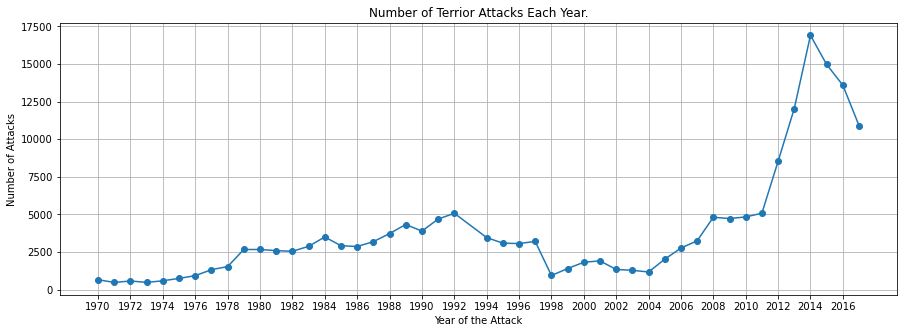

In [14]:
subset["iyear"].value_counts().sort_index().plot(figsize=(15, 5), marker="o", grid=True)
plt.xticks(range(subset["iyear"].min(), subset["iyear"].max(), 2))
plt.xlabel("Year of the Attack")
plt.ylabel("Number of Attacks")
plt.title("Number of Terrior Attacks Each Year.");

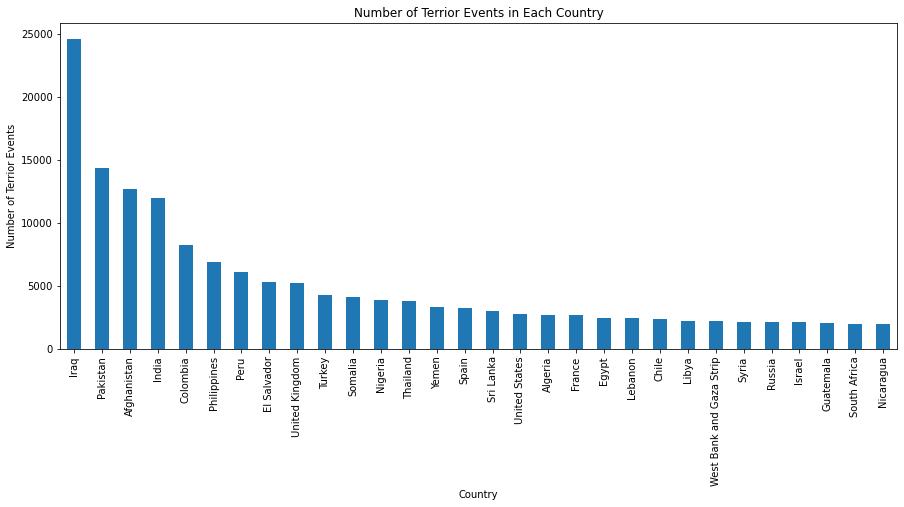

In [15]:
country_counts = subset["country_txt"].value_counts().sort_values().nlargest(30)
country_counts.plot.bar(figsize=(15, 6))
plt.xlabel("Country")
plt.ylabel("Number of Terrior Events")
plt.title("Number of Terrior Events in Each Country");

In [16]:
nevents_by_year_and_country = subset.groupby(["country_txt", "iyear"])["country_txt"].count().unstack().fillna(-1)
top_nevents_by_year_and_country = nevents_by_year_and_country[list(range(2000, 2018, 1))].loc[country_counts.index]
top_nevents_by_year_and_country.head()

iyear,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Iraq,10.0,3.0,6.0,102.0,323.0,617.0,838.0,1047.0,1106.0,1137.0,1179.0,1308.0,1437.0,2852.0,3933.0,2751.0,3360.0,2466.0
Pakistan,49.0,53.0,46.0,29.0,67.0,77.0,164.0,260.0,568.0,667.0,713.0,1012.0,1654.0,2215.0,2151.0,1243.0,864.0,719.0
Afghanistan,14.0,14.0,38.0,100.0,88.0,155.0,282.0,341.0,414.0,503.0,542.0,421.0,1469.0,1443.0,1824.0,1928.0,1617.0,1414.0
India,180.0,234.0,184.0,196.0,108.0,146.0,167.0,149.0,534.0,672.0,663.0,645.0,611.0,694.0,860.0,884.0,1025.0,966.0
Colombia,137.0,207.0,150.0,98.0,37.0,42.0,43.0,30.0,133.0,139.0,136.0,94.0,115.0,149.0,231.0,136.0,109.0,117.0


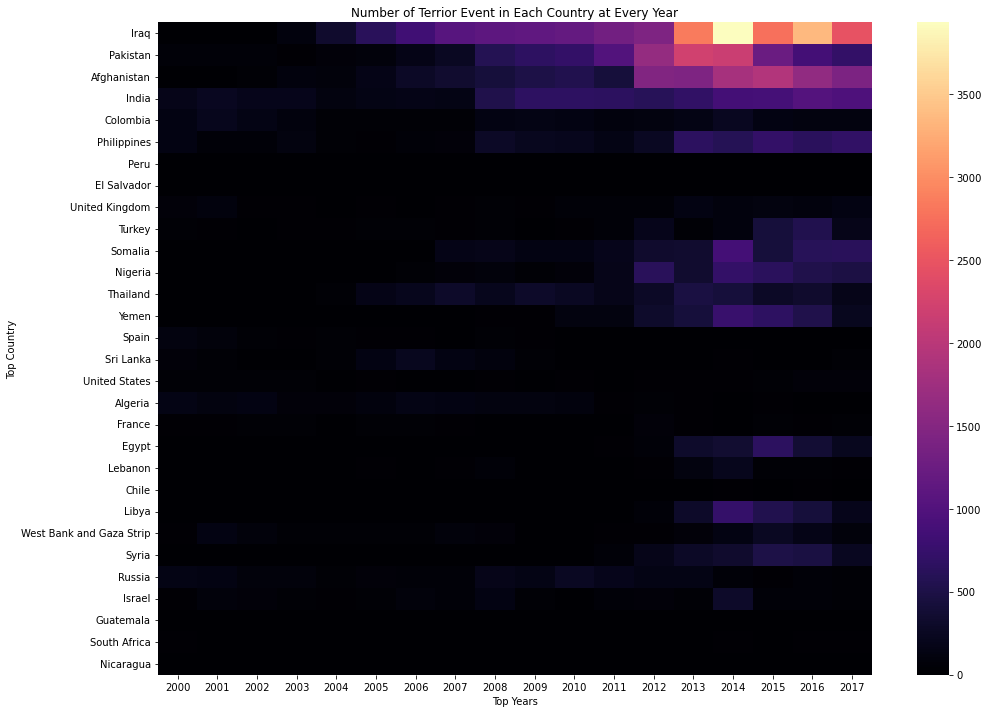

In [17]:
plt.figure(figsize=(16, 12))
sns.heatmap(top_nevents_by_year_and_country, annot=False, cmap="magma")
plt.xlabel("Top Years")
plt.ylabel("Top Country")
plt.title("Number of Terrior Event in Each Country at Every Year");

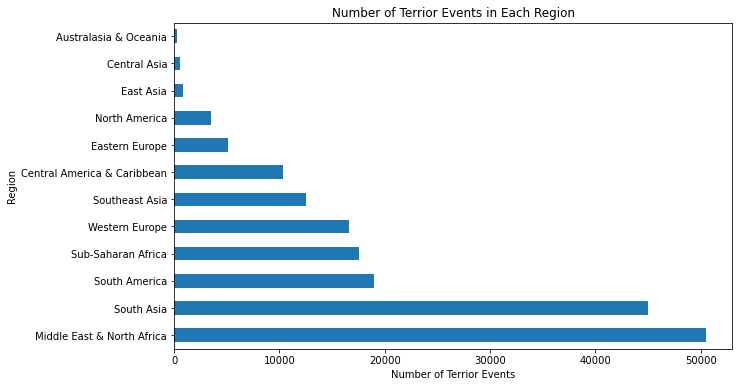

In [18]:
region_counts = subset["region_txt"].value_counts().sort_values().nlargest(30)
region_counts.plot.barh(figsize=(10, 6))
plt.xlabel("Number of Terrior Events")
plt.ylabel("Region")
plt.title("Number of Terrior Events in Each Region");

In [19]:
nevents_by_year_and_region = subset.groupby(["region_txt", "iyear"])["region_txt"].count().unstack().fillna(-1)
nevents_by_year_and_region.head()

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
region_txt,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,1.0,1.0,8.0,1.0,1.0,-1.0,-1.0,-1.0,2.0,2.0,...,8.0,1.0,1.0,-1.0,-1.0,1.0,9.0,14.0,10.0,12.0
Central America & Caribbean,7.0,5.0,3.0,6.0,11.0,9.0,45.0,24.0,199.0,609.0,...,-1.0,9.0,1.0,1.0,1.0,14.0,5.0,1.0,3.0,4.0
Central Asia,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,36.0,31.0,9.0,9.0,12.0,7.0,9.0,10.0,17.0,7.0
East Asia,2.0,1.0,-1.0,2.0,4.0,12.0,2.0,4.0,35.0,16.0,...,25.0,8.0,1.0,4.0,4.0,15.0,43.0,28.0,8.0,7.0
Eastern Europe,12.0,5.0,1.0,1.0,2.0,-1.0,-1.0,2.0,2.0,1.0,...,209.0,165.0,261.0,198.0,173.0,165.0,962.0,684.0,134.0,110.0


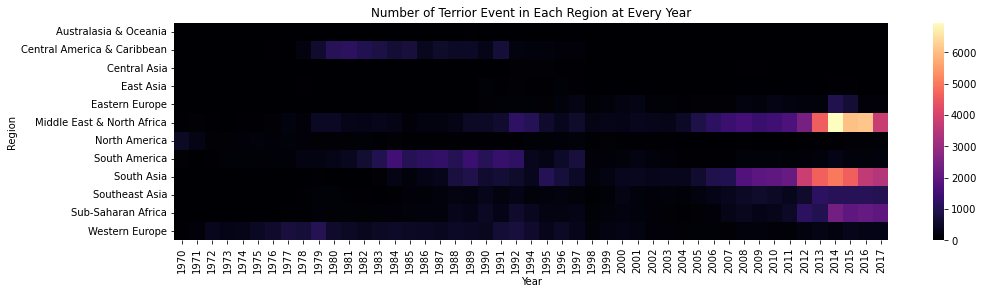

In [20]:
plt.figure(figsize=(16, 4))
sns.heatmap(nevents_by_year_and_region, annot=False, cmap="magma")
plt.xlabel("Year")
plt.ylabel("Region")
plt.title("Number of Terrior Event in Each Region at Every Year");

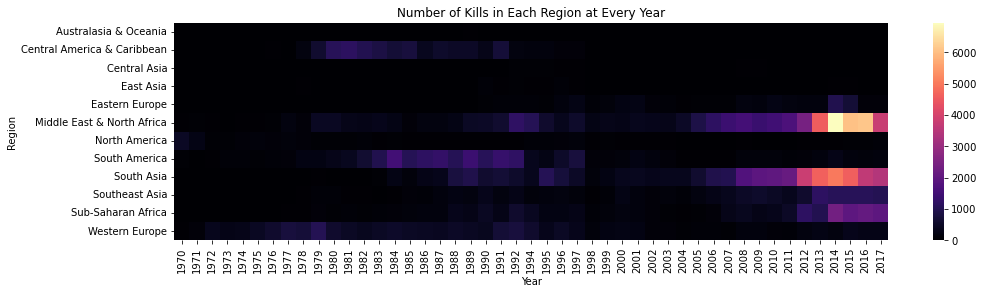

In [21]:
nkills_by_year_and_region = subset.groupby(["region_txt", "iyear"])["nkill"].sum().unstack().fillna(-1)

plt.figure(figsize=(16, 4))
sns.heatmap(nevents_by_year_and_region, annot=False, cmap="magma")
plt.xlabel("Year")
plt.ylabel("Region")
plt.title("Number of Kills in Each Region at Every Year");

In [22]:
subset["weaptype1_txt"].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [23]:
subset[subset["weaptype1_txt"] == "Radiological"]["country_txt"]

2342           Austria
8498            France
24796    United States
70505            Japan
70506            Japan
70507            Japan
70508            Japan
70509            Japan
70518            Japan
70531            Japan
70532            Japan
70533            Japan
70534            Japan
85127      Afghanistan
Name: country_txt, dtype: object

**Key Insights:**

> From the first image above we can see a very high increase in the number of terrior attacks between the **2010** and **2017** with approximitly **3500** terrior event increase each year. We also can see that the terrior events starts to decrease after **2014** but it still very high compared to the pervious year from **1970** till **2004**.

> When we investigate more and calculate the number of attacks at each country we can see that most of the attacks happend mostly in 4 country which are (Iraq, Pakistan, Afghanistan, and India).
> After we look at the number of Terrior attacks at each Regions we also see that it's mostly located in **Middle East & North Africa** with nearly **50K** attacks happend.

> If we investigate more on the number of attacks at each country and each year we see that is mostly located at Iraq around the **2012 till 2017**.
> When we check the same thiing but for the region not the country we see also that is mostly located in middle east between also **2012 till 2017** which does make sense as Iraq is located in middle east.

> We also can see that most of the Terrior Attacks are done using **Explosive & Firearms**.


**Notes**
> Something that got my attention is the use of **Radiological & Biological Weapons** in Terrior Attacks. which is something very insane and very crul for a human to do.

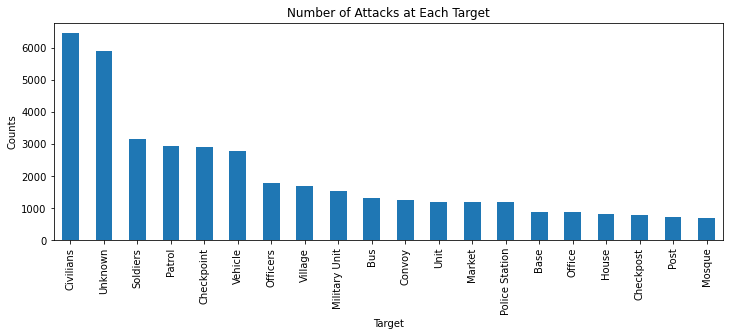

In [24]:
target_counts = subset["target1"].value_counts().nlargest(20)
target_counts.plot.bar(figsize=(12, 4))
plt.xlabel("Target")
plt.ylabel("Counts")
plt.title("Number of Attacks at Each Target");

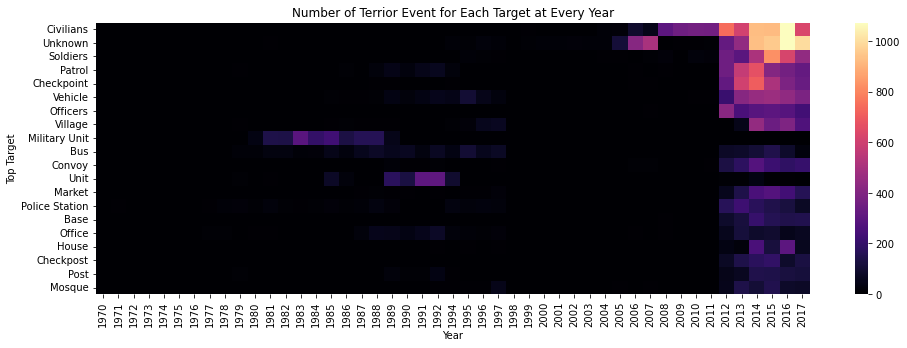

In [25]:
top_attacks_by_year_and_target = (
    subset.groupby(["iyear", "target1"])["target1"]
    .count().unstack().fillna(-1)[target_counts.index]
).transpose()

plt.figure(figsize=(16, 5))
sns.heatmap(top_attacks_by_year_and_target, annot=False, cmap="magma")
plt.xlabel("Year")
plt.ylabel("Top Target")
plt.title("Number of Terrior Event for Each Target at Every Year");


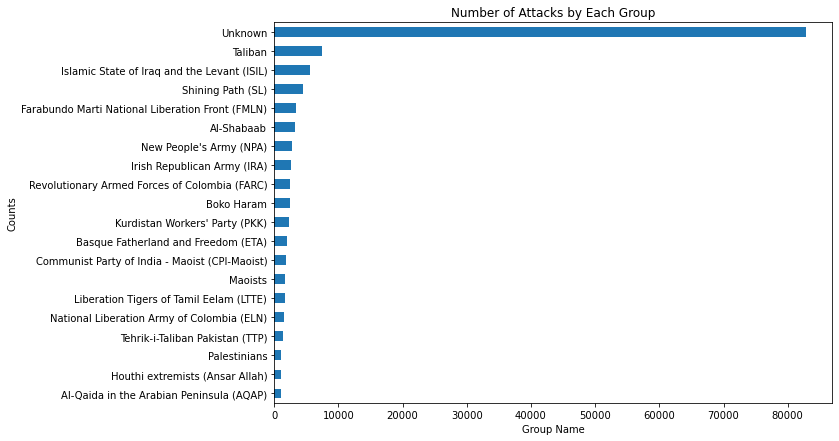

In [26]:
gname_counts = subset["gname"].value_counts().nlargest(20).sort_values(ascending=True)

gname_counts.plot.barh(figsize=(10, 7))
plt.xlabel("Group Name")
plt.ylabel("Counts")
plt.title("Number of Attacks by Each Group");

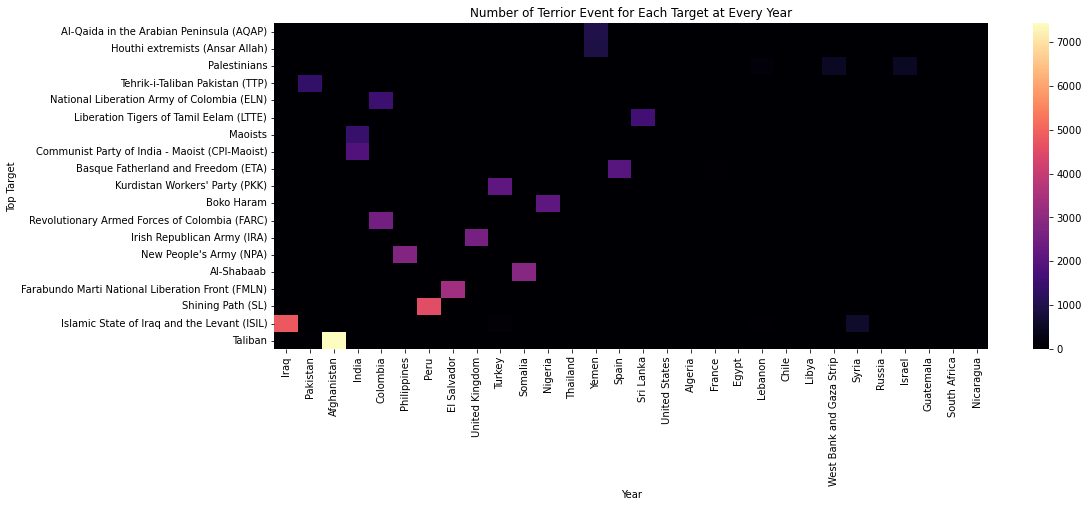

In [27]:
nevents_by_gname_and_country = subset.groupby(["gname", "country_txt"])["gname"].count().unstack().fillna(-1)
top_nevents_by_gname_and_country = nevents_by_gname_and_country[country_counts.index].loc[gname_counts.index[:-1]]


plt.figure(figsize=(16, 6))
sns.heatmap(top_nevents_by_gname_and_country, annot=False, cmap="magma")
plt.xlabel("Year")
plt.ylabel("Top Target")
plt.title("Number of Terrior Event for Each Target at Every Year");

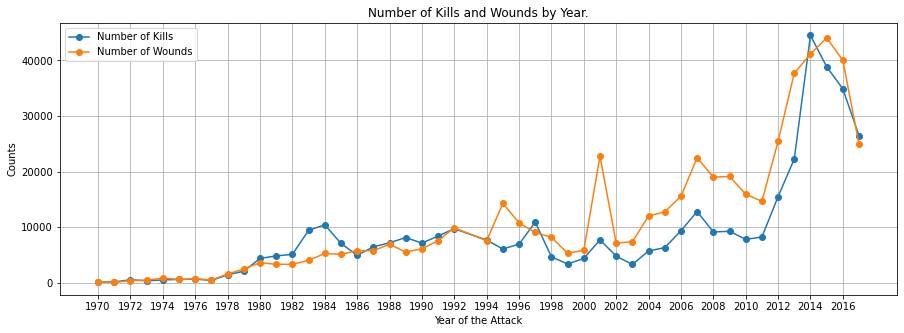

In [28]:
subset.groupby("iyear")[["nkill", "nwound"]].sum().plot(figsize=(15, 5), marker="o", grid=True)
plt.xticks(range(subset["iyear"].min(), subset["iyear"].max(), 2))
plt.xlabel("Year of the Attack")
plt.ylabel("Counts")
plt.title("Number of Kills and Wounds by Year.");
plt.legend(["Number of Kills", "Number of Wounds"])

In [29]:
subset.loc[
    subset["weaptype1_txt"] == "Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
    , "weaptype1_txt"
] = "Vehicle"

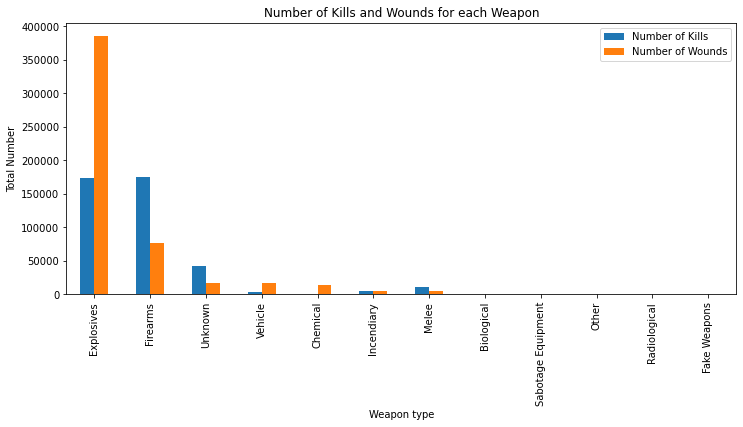

In [30]:
(
    subset.groupby("weaptype1_txt")[["nkill", "nwound"]]
    .sum().sort_values(["nwound", "nkill"], ascending=False)
    .plot.bar(figsize=(12, 5))
)
plt.legend(["Number of Kills", "Number of Wounds"])
plt.xlabel("Weapon type")
plt.ylabel("Total Number")
plt.title("Number of Kills and Wounds for each Weapon");

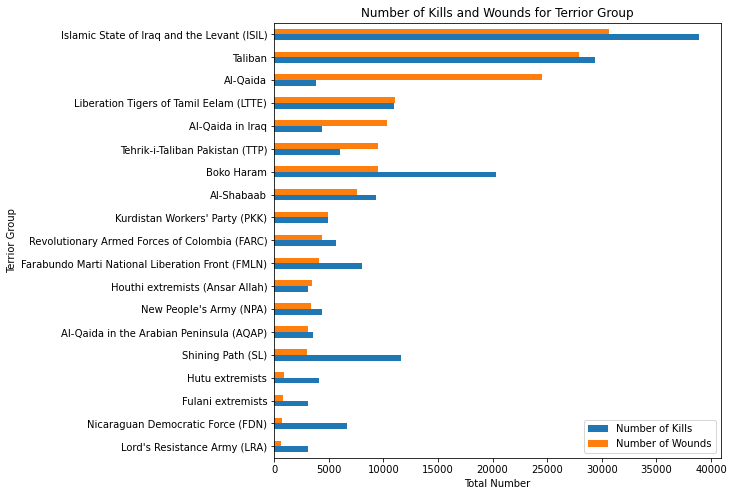

In [31]:
(
    subset.groupby("gname")[["nkill", "nwound"]]
    .sum().nlargest(20, ["nkill", "nwound"])
    .sort_values(["nwound", "nkill"], ascending=True)
    .drop("Unknown", axis="rows")
    .plot.barh(figsize=(8, 8))
)
plt.legend(["Number of Kills", "Number of Wounds"])
plt.xlabel("Total Number")
plt.ylabel("Terrior Group")
plt.title("Number of Kills and Wounds for Terrior Group");

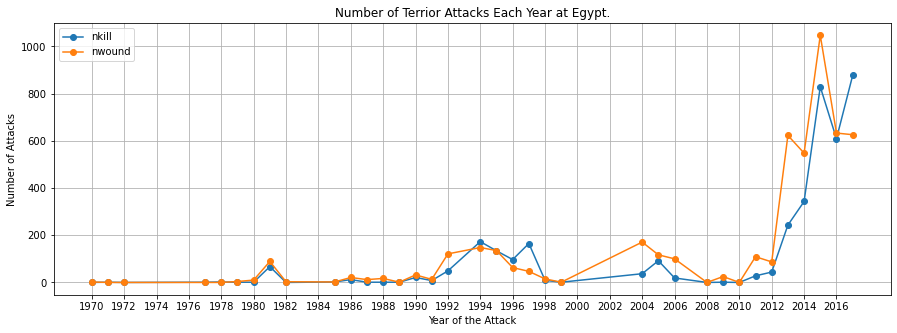

In [32]:
egypt_subset = subset[subset["country_txt"] == "Egypt"]
(
    egypt_subset.groupby("iyear")[["nkill", "nwound"]].sum().sort_index()
    .plot(figsize=(15, 5), marker="o", grid=True)
)
plt.xticks(range(subset["iyear"].min(), subset["iyear"].max(), 2))
plt.xlabel("Year of the Attack")
plt.ylabel("Number of Attacks")
plt.title("Number of Terrior Attacks Each Year at Egypt.");